<h1>DataFrame Apply 실습</h1>
<br>
0~15 사이의 숫자로 4x4 행렬을 생성하고 DataFrame을 생성한 후에<br>
각 행의 평균을 구하여 표시해보세요.<br>
DataFrame의 apply()함수를 사용하면 됩니다

In [37]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(0,16).reshape(4,4),columns=['W','X','Y','Z'])
df.apply(lambda x:x.mean(),axis=1)

# 각 컬럼의 분산과 표준편차를 구해서 Series에 저장하여 화면에 표시하시오
# 분산 : 편차의 제곱의 합

v = df.apply(lambda x:np.var(x))
resS = pd.DataFrame([v,np.sqrt(v)],index=['Var','Std'])
resS

def var_std(c):
    return pd.Series([np.var(c), np.std(c)], index=['분산','표준편차'])
df.apply(var_std)

# rank() method 파라미터 테스트
print(pd.Series([12,13,11,14,14], index=['A','B','C','D','E']).rank())
print(pd.Series([12,13,11,14,14], index=['A','B','C','D','E']).rank(method='first'))

A    2.0
B    3.0
C    1.0
D    4.5
E    4.5
dtype: float64
A    2.0
B    3.0
C    1.0
D    4.0
E    5.0
dtype: float64


<h2>공분산, 상관관계</h2>

X의 평균: 52.79
Y의 평균: 53.1


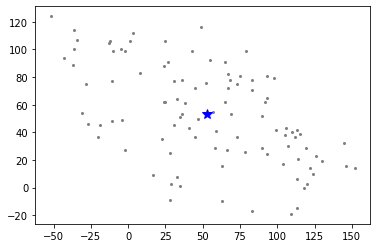

공분산 : -959.4390000000001 , 피어슨 상관계수: -0.5433212948677056


In [179]:
import matplotlib.pyplot as plt

X = np.array(np.arange(0,100)+np.random.randint(-60,60,100))
Y = np.array(np.arange(0,100)*(-1)+100+np.random.randint(-30,30,100))
print('X의 평균:',X.mean())
print('Y의 평균:',Y.mean())
plt.plot(X,Y,linestyle='none',marker='o',markersize=2, color='gray')
plt.plot(X.mean(),Y.mean(),linestyle='none',marker='*',markersize=10,color='blue')
plt.show()

cov = np.mean((X-X.mean())*(Y-Y.mean()))
cor = cov/(X.std(ddof=0)*Y.std(ddof=0))
print('공분산 :',cov,', 피어슨 상관계수:',cor)

<h2>공분산행렬, 상관계수행렬</h2>

In [173]:
X = pd.Series(np.arange(0,100)+np.random.randint(-60,60,100))
Y = pd.Series(np.arange(0,100)*(-1)+100+np.random.randint(-30,30,100))
data = np.concatenate((X,Y)).reshape(20,10)
df = pd.DataFrame(data)
print('공분산행렬:\n',np.cov(X,Y))
print('상관계수행렬:\n',np.corrcoef(X,Y))
df2 = df.T
df.corr()

공분산행렬:
 [[2100.98989899 -897.53535354]
 [-897.53535354 1233.36111111]]
상관계수행렬:
 [[ 1.         -0.55756366]
 [-0.55756366  1.        ]]


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.421226,0.646480,0.593586,0.530713,0.384376,0.430590,0.305105,0.673706,0.554067
1,0.421226,1.000000,0.553180,0.489319,0.234448,0.518075,0.683064,0.462663,0.368540,0.487474
2,0.646480,0.553180,1.000000,0.652547,0.527496,0.738564,0.439919,0.584596,0.727945,0.673486
3,0.593586,0.489319,0.652547,1.000000,0.565945,0.643591,0.308464,0.374271,0.711147,0.696334
4,0.530713,0.234448,0.527496,0.565945,1.000000,0.532600,0.489806,0.502483,0.581455,0.537734
5,0.384376,0.518075,0.738564,0.643591,0.532600,1.000000,0.276130,0.510045,0.715494,0.688681
6,0.430590,0.683064,0.439919,0.308464,0.489806,0.276130,1.000000,0.439266,0.226283,0.252399
7,0.305105,0.462663,0.584596,0.374271,0.502483,0.510045,0.439266,1.000000,0.292869,0.698562
8,0.673706,0.368540,0.727945,0.711147,0.581455,0.715494,0.226283,0.292869,1.000000,0.609761
9,0.554067,0.487474,0.673486,0.696334,0.537734,0.688681,0.252399,0.698562,0.609761,1.000000


<h2>2차원 index 가진 Series와 DataFrame 전환</h2>
<br>
주 인덱스 : A동, B동, C동<br>
하위 인덱스 : 1층, 2층, 3층    1층, 2층    1층,2층,3층,4층<br>

In [187]:
ser = pd.Series(np.random.randint(0,1000,9),index = [['Adong','Adong','Adong','Bdong','Bdong','Cdong','Cdong','Cdong','Cdong'],['1stF','2ndF','3rdF','1stF','2ndF','1stF','2ndF','3rdF','4thF']])
print(ser)
df = ser.unstack()
ser2 = df.stack()
print(ser2)
df

Adong  1stF    874
       2ndF    858
       3rdF    535
Bdong  1stF    676
       2ndF    994
Cdong  1stF    865
       2ndF    324
       3rdF    520
       4thF    550
dtype: int32
Adong  1stF    874.0
       2ndF    858.0
       3rdF    535.0
Bdong  1stF    676.0
       2ndF    994.0
Cdong  1stF    865.0
       2ndF    324.0
       3rdF    520.0
       4thF    550.0
dtype: float64


,1stF,2ndF,3rdF,4thF
Adong,874.0,858.0,535.0,NaN
Bdong,676.0,994.0,NaN,NaN
Cdong,865.0,324.0,520.0,550.0


<h2>CRUD</h2>
<br>
DataFrame에 5명분의 회원정보를 저장하고 관리하기(CRUD)<br>
목록(s),검색(f),추가(a),수정(u),삭제(d),종료(x)<br>
- 파일과 무관<br>
- df.append()를 사용하면 추가할 수 있음

In [221]:
dat = [[7,'Son','fw',3000],[10,'Kane','fw',3000],[20,'Ali','mf',1800],[17,'Sissoko','mf',1600],[4,'Alderweireld','df',1800]]

tot = pd.DataFrame(dat,columns = ['번호','이름','부서','급여'])


""""""
while True:
    comm = input('\n----명령어를 입력하세요(목록-s, 검색-f, 추가-a, 수정-u, 삭제-d, 종료-x): ')
    if comm == 's':
        print(tot)
    elif comm == 'f':
        print('<<<<멤버 검색>>>>')
        wayToFind = input(' 번호로 검색하시려면 1, 부서로 검색하시려면 2를 입력하세요:')
        if wayToFind == '1':
            fnum = input(' 검색할 번호를 입력하세요 :')
            for ind in tot.index:
                if tot.loc[ind]['번호']==int(fnum):
                    print(tot.loc[ind])
        elif wayToFind == '2':
            dep = input(' 검색할 부서명을 입력하세요 :')
            print(f'\n-----{dep}부서 명단------')
            for ind in tot.index:
                if tot.loc[ind]['부서'] == dep:
                    print(tot.loc[ind]['부서'],tot.loc[ind]['번호'],tot.loc[ind]['이름'],tot.loc[ind]['급여'])
            salMean = np.mean(tot['급여'][tot['부서']==dep])
            salTot = np.sum(tot['급여'][tot['부서']==dep])
            print(f'평균급여:{salMean}\n급여합계:{salTot}')
        else:
            print('1 또는 2를 입력하세요')
    elif comm == 'a':
        print('<<<<멤버 추가>>>>')
        info = input(' 번호 이름 부서 연봉을 띄어서 입력하세요\n')
        if(len(info.split())!=4):
            print('형식에 맞추어 입력하세요')
        else:
            tnum, tname, tdep, tsal = int(info.split()[0]), info.split()[1], info.split()[2], int(info.split()[3])
            tmem = np.array([(tnum, tname, tdep, tsal)],dtype=[('num','i2'),('name','U12'),('dep','U2'),('sal','i2')])
            tot = tot.append(tmem)
            print('저장 완료!')
    elif comm == 'u':
        print('<<<<멤버 수정>>>>')
        fnum = input(' 수정할 번호를 입력하세요 :')
        for ind in tot.index:
            if tot.loc[ind]['번호']==int(fnum):
                info = input(' 변경할 이름과 부서, 급여를 띄어서 입력하세요\n')
                tot.loc[ind]['이름'], tot.loc[ind]['부서'] = info.split(' ')[0:2]
                tot.loc[ind]['급여'] = int(info.split(' ')[2])
                print('수정 완료!')
    elif comm == 'd':
        print('<<<<멤버 삭제>>>>')
        fnum = input('삭제할 번호를 입력하세요 :')
        tot = np.delete(tot, np.where(tot['번호']==int(fnum)))
        print('삭제 완료!')
    elif comm == 'x':
        break
print('\n[[[[[[[[[  프로그램 종료~(^.^)~~~  ]]]]]]]]]')


----명령어를 입력하세요(목록-s, 검색-f, 추가-a, 수정-u, 삭제-d, 종료-x): f
<<<<멤버 검색>>>>
 번호로 검색하시려면 1, 부서로 검색하시려면 2를 입력하세요:2
 검색할 부서명을 입력하세요 :fw

-----fw부서 명단------
fw 7 Son 3000
fw 10 Kane 3000
평균급여:3000.0
급여합계:6000

----명령어를 입력하세요(목록-s, 검색-f, 추가-a, 수정-u, 삭제-d, 종료-x): u
<<<<멤버 수정>>>>
 수정할 번호를 입력하세요 :20
 변경할 이름과 부서, 급여를 띄어서 입력하세요
Ali fw 2200


<ipython-input-221-80de82fac832>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot.loc[ind]['이름'], tot.loc[ind]['부서'] = info.split(' ')[0:2]
<ipython-input-221-80de82fac832>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot.loc[ind]['급여'] = int(info.split(' ')[2])


수정 완료!

----명령어를 입력하세요(목록-s, 검색-f, 추가-a, 수정-u, 삭제-d, 종료-x): s
   번호            이름  부서    급여
0   7           Son  fw  3000
1  10          Kane  fw  3000
2  20           Ali  mf  1800
3  17       Sissoko  mf  1600
4   4  Alderweireld  df  1800

----명령어를 입력하세요(목록-s, 검색-f, 추가-a, 수정-u, 삭제-d, 종료-x): x

[[[[[[[[[  프로그램 종료~(^.^)~~~  ]]]]]]]]]
